### Toymodel Train Test Evaluation

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import cVAESolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from mapsgan.losses import kl_loss
from torch import optim
%env CUDA_VISIBLE_DEVICES=0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [3]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='cvae')
discriminator = ToyDiscriminator()

In [6]:
solver = cVAESolver(generator, discriminator, 
                loss_fns={'traj': nn.L1Loss, 'disc': nn.BCEWithLogitsLoss, 'kl':kl_loss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}})

#### Training

In [8]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, print_every=10, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses              Discriminator Losses
Epochs G_BCE     G_L1      G_KL      D_Real    D_Fake    
500    0.661     0.240     3.544     0.632     0.748     
490    0.673     0.214     0.481     0.667     0.738     


Process Process-25:
Traceback (most recent call last):
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/j.lappal

KeyboardInterrupt: 

In [12]:
solver.optimizer_g.

<bound method Optimizer.load_state_dict of Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)>

#### Test

In [9]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

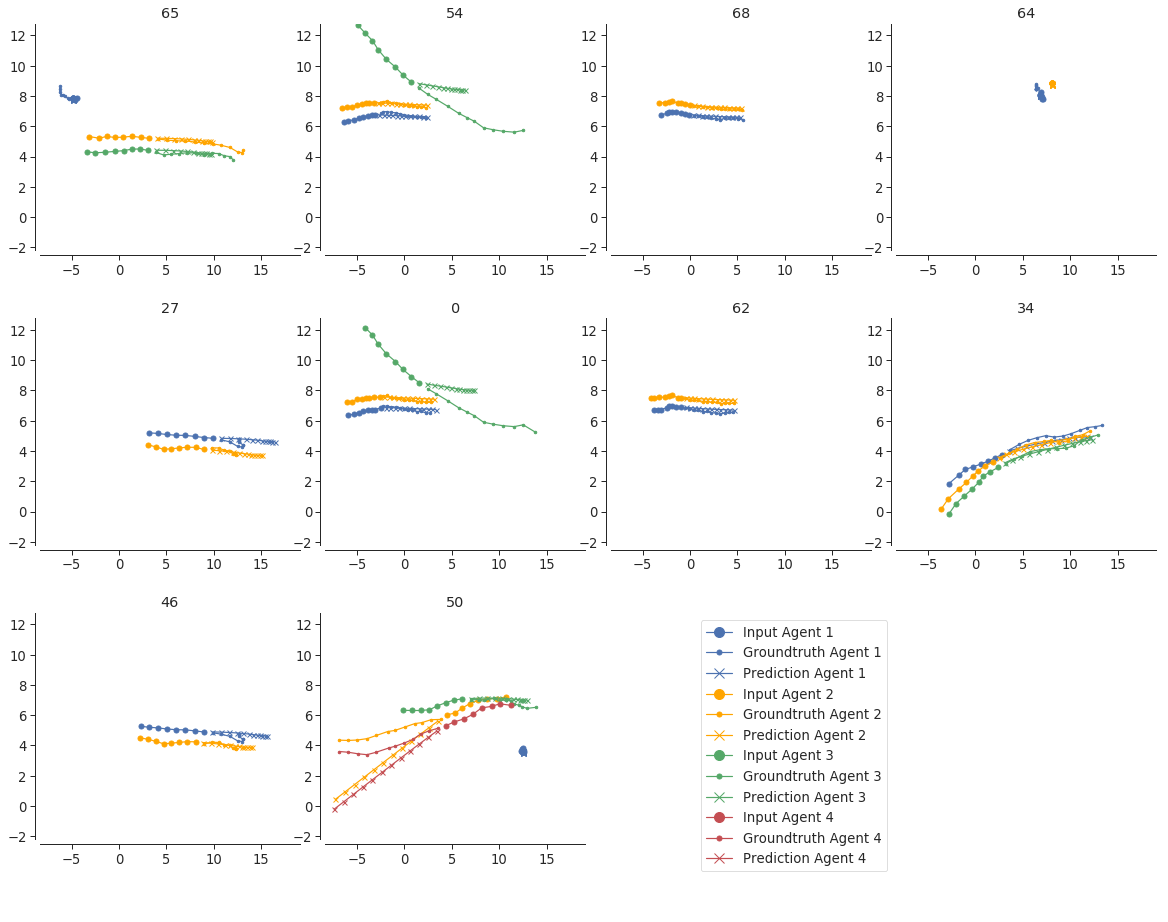

In [11]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])